<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>eXplainable AI: A small introduction</center>
<hr style=" border:none; height:3px;">
</h1>

The objective is to make a first dive in the sea of explainable Artificial Intelligence. 
In this lab you will ask to :

+ Build, with your knowledge in Artificial Intelligence, a classification model to determine whether a person makes over 50K a year using the well-known [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult).
+ Try to explain your model
+ Test some existing tools in order to familiarize with these tools but also to test if their use inscrease your knowledge and belief on your model.


# Requirements



You have to install using pip, the following modules.

* numpy
* pandas
* scipy
* scikit-learn
* matplotlib

# Data handling and simple data exploration

[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) is one of the most popular datasets which is a representative of the Finance domain. The dataset contains 32561 records of individuals including several features like occupation, age, marital status and so on (14 features). The prediction task is to determine whether a person makes over 50K a year.


With `pandas`, load and open the `adult.data` file as a dataframe and perform simple data exploration.


In [2]:
import pandas as pd

columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    header=None,
                    names=columns)

data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Simple data exploration

One of the principle of XAI and of responsible AI is to have a good knowledge on the input data. Propose and write some functions to have a better understanding of your input data.
Some questions are for instance :

+ The number of missing values 
+ The Class distribution in the dataset
+ Information on the correlation of the features
+ ...

In [3]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
WorkClass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationNum,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
MaritalStatus,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The labels are present in the Income column.

What are your key observations

In [4]:
# Checking for missing values
data.isna().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
Income           0
dtype: int64

### Class distribution in the dataset

In [5]:
from collections import Counter

classes = Counter(data['Income'].values)
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,<=50K,24720
1,>50K,7841


### How are the features correlated?

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
plt.style.use('ggplot')

%matplotlib inline

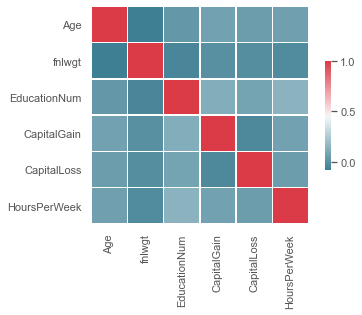

In [7]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Start of machine learning modeling



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_cols = data.columns[0:-1]
label = data.columns[-1]
X = data[train_cols]
y = data[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

Before writing your classification model, you will use the [`interpret`](https://interpret.ml/) library to better explore your dataset.
First install it.

In [9]:
!pip install pyscaffold
!pip install -U interpret

Requirement already up-to-date: interpret in c:\users\marco\anaconda3\lib\site-packages (0.2.4)


## Explore your dataset with interpret

Run the code below in order to explore the dataset using `interpret`

In [10]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

<!-- http://127.0.0.1:7182/1428038535968/ -->

## Build and Train your model


Here, you will have to :
+ Build your classification model with  scikit-learn.
+ Build another classification model with [`tabular_learner`](https://docs.fast.ai/tabular.learner.html) of fast.ai.
+ Try to explain your model

## With scikit-learn

In [11]:
# Extracting the categorical and non-categorical features
cat_feats = [column for column in data.columns if data[column].dtypes=='object']
non_cat_feats = [column for column in data.columns if data[column].dtypes!='object']

In [12]:
# Label encode categories
from sklearn.preprocessing import LabelEncoder

data[cat_feats] = data[cat_feats].apply(LabelEncoder().fit_transform)

In [13]:
# Standard scale the numeric features and assign them
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_train = StandardScaler().fit_transform(X_train[non_cat_feats].values)
scaled_test = StandardScaler().fit_transform(X_test[non_cat_feats].values)



In [14]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)


knn = KNeighborsClassifier()
knn.fit(scaled_train, y_train)

KNeighborsClassifier()

In [15]:
#show first 5 model predictions on the test data
preds= knn.predict(scaled_test)

In [16]:
#check accuracy of our model on the test data
knn.score(scaled_test, y_test)

0.8003992015968064

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8003992015968064

## With fast.ai

In [18]:
!pip3 install fastai==1.0.58

In [19]:
from fastai.tabular import * 
import torch

torch.cuda.manual_seed_all(7)

In [20]:
preprocessing = [FillMissing, Categorify, Normalize]

In [21]:
dep_var = 'Income'
cat_names = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender', 'NativeCountry']

In [22]:
# not use of  a randomized validation set. use of the last 2000 entries for the purpose.

valid_idx = range(len(data)-2000, len(data))

path="."

databunch = TabularDataBunch.from_df(path, data, dep_var, valid_idx=valid_idx, procs=preprocessing, cat_names=cat_names)

In [23]:
databunch.show_batch()

WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry,Age,CapitalGain,CapitalLoss,EducationNum,fnlwgt,HoursPerWeek,target
4,15,4,14,1,4,1,39,-0.9941,-0.1462,-0.2161,-0.0296,-1.2130,0.7779,0
4,15,0,14,1,4,1,39,0.6914,0.3002,-0.2161,-0.0296,1.4988,1.0214,0
4,11,2,4,0,4,1,11,-0.7010,-0.1462,-0.2161,-0.4186,-0.0992,-0.0338,0
4,9,4,4,3,4,1,39,-0.3346,-0.1462,-0.2161,1.1375,0.3686,-0.0338,0
4,0,4,3,2,2,1,39,0.1052,-0.1462,-0.2161,-1.5857,-0.3296,1.1837,0


In [24]:
train_dist = Counter(databunch.train_ds.y)
pd.DataFrame(train_dist.most_common(), columns=['Classes', '#'])

,Classes,#
0,0,23235
1,1,7326


In [25]:
valid_dist = Counter(databunch.valid_ds.y)
pd.DataFrame(valid_dist.most_common(), columns=['Classes', '#'])

,Classes,#
0,0,1485
1,1,515


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


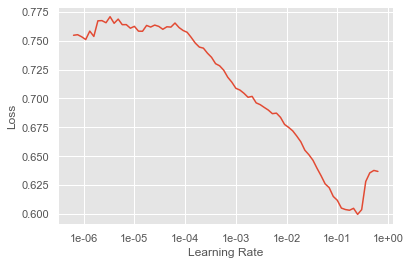

In [26]:
learn = tabular_learner(databunch, layers=[200,100], emb_szs={'NativeCountry': 10}, metrics=accuracy)
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(5, max_lr=slice(1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.391957,0.362177,0.835000,00:51
1,0.332683,0.338039,0.840500,00:49
2,0.321819,0.332131,0.842000,00:51
3,0.314706,0.328009,0.843500,00:52
4,0.301619,0.325733,0.844500,00:55


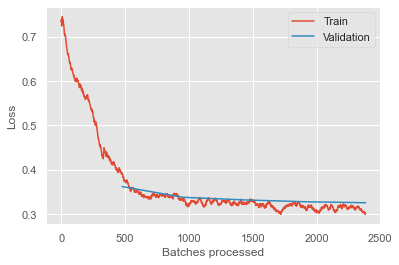

In [28]:
learn.recorder.plot_losses()

## Explaining your models

To explain your models, we will another time use the `interpret` library and we will also use the [`shapash`](https://github.com/MAIF/shapash) tool that propose other kinds of visualization.


With `interpret`

In [29]:
!pip install scikit-plot

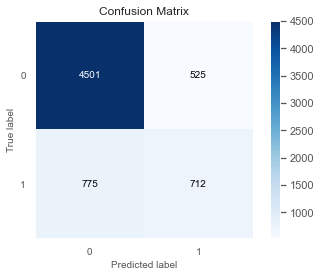

In [30]:
import scikitplot as skplt


skplt.metrics.plot_confusion_matrix(y_test, preds)
plt.show()

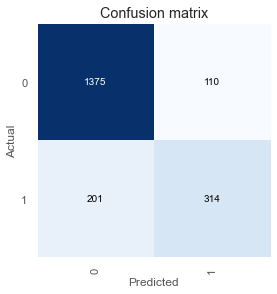

In [31]:
# interpretation of fastAi model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

With `shapash`

Change to shap since shapash does not support many models

In [32]:
!pip install shap

In [33]:
import shap

shap.initjs()

In [34]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.2, random_state=7)

In [54]:
y_valid

array([False,  True, False, False, ..., False, False, False, False])

In [35]:
X_train.shape

(26048, 12)

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
knn.predict_proba(X_train)

array([[0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2]])

In [52]:
X_train

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
12011,51.0,4,10.0,0,6,0,4,0,0.0,0.0,40.0,21
23599,51.0,1,14.0,6,12,1,4,1,0.0,0.0,50.0,8
23603,21.0,4,11.0,4,3,3,2,1,0.0,0.0,40.0,39
6163,25.0,4,10.0,4,12,3,4,1,0.0,0.0,24.0,39
14883,48.0,4,13.0,0,1,3,4,1,0.0,0.0,38.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
5699,23.0,4,9.0,4,12,0,4,1,0.0,0.0,40.0,39
10742,37.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
16921,27.0,6,5.0,2,3,4,4,1,0.0,0.0,40.0,39
25796,46.0,4,16.0,2,10,4,4,1,0.0,2415.0,55.0,39


In [51]:
X_train.median()

Age               37.0
Workclass          4.0
Education-Num     10.0
Marital Status     2.0
Occupation         7.0
Relationship       3.0
Race               4.0
Sex                1.0
Capital Gain       0.0
Capital Loss       0.0
Hours per week    40.0
Country           39.0
dtype: float64

In [37]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values_single, X_display.iloc[0,:])

In [38]:
shap_values = explainer.shap_values(X_valid.iloc[0:1000,:], nsamples=1000)
shap.force_plot(explainer.expected_value, shap_values, X_valid.iloc[0:1000,:])

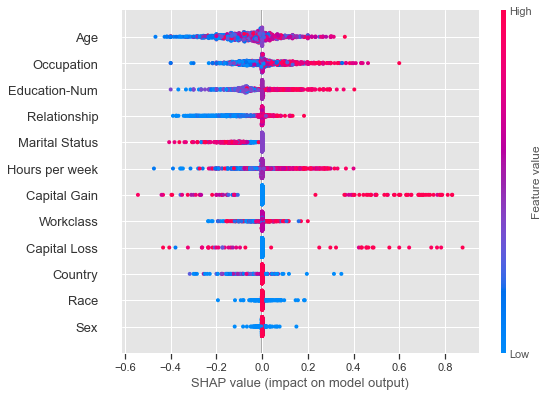

In [39]:
shap.summary_plot(shap_values, X_valid.iloc[0:1000,:])

# Train the Explainable Boosting Machine (EBM)
We will now use an glassbox interpretable methods. For some information on this method you can read [this](https://blog.fiddler.ai/2019/06/a-gentle-introduction-to-ga2ms-a-white-box-model/) or watch [this](https://www.youtube.com/watch?v=MREiHgHgl0k).

These kinds of models will be explained in the next course. We use here the EBM model of the `interpret`library


In [40]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier(random_state=seed, n_jobs=-1)
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

ExplainableBoostingClassifier(feature_names=['Age', 'Workclass',
                                             'Education-Num', 'Marital Status',
                                             'Occupation', 'Relationship',
                                             'Race', 'Sex', 'Capital Gain',
                                             'Capital Loss', 'Hours per week',
                                             'Country',
                                             'Relationship x Hours per week',
                                             'Education-Num x Marital Status',
                                             'Age x Relationship',
                                             'Age x Hours per week',
                                             'Marital Status x Hours per week',
                                             'Education-Num x Relationship',
                                             'Educat...
                                             'Relationship x Ca

In [41]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7182/1426550320336/ -->

## Local Explanations: How an individual prediction was made

In [42]:
ebm_local = ebm.explain_local(X_valid[:5], y_valid[:5], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7182/1426711183760/ -->

## Evaluate EBM performance

In [43]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_valid, y_valid, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7182/1426713086032/ -->

## Let's test out a few other Explainable Models

In [44]:
from interpret.glassbox import LogisticRegression, ClassificationTree

# We have to transform categorical variables to use Logistic Regression and Decision Tree
X_enc = pd.get_dummies(X, prefix_sep='.')
feature_names = list(X_enc.columns)
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_enc, y, test_size=0.20, random_state=seed)

lr = LogisticRegression(random_state=seed, feature_names=feature_names, penalty='l1', solver='liblinear')
lr.fit(X_train_enc, y_train)

tree = ClassificationTree()
tree.fit(X_train_enc, y_train)

## Compare performance using the Dashboard

In [45]:
lr_perf = ROC(lr.predict_proba).explain_perf(X_test_enc, y_test, name='Logistic Regression')
tree_perf = ROC(tree.predict_proba).explain_perf(X_test_enc, y_test, name='Classification Tree')

show(lr_perf)
show(tree_perf)
show(ebm_perf)

<!-- http://127.0.0.1:7182/1426713087568/ -->

<!-- http://127.0.0.1:7182/1426711482912/ -->

<!-- http://127.0.0.1:7182/1426713086032/ -->

## Glassbox: All of our models have global and local explanations

In [46]:
lr_global = lr.explain_global(name='Logistic Regression')
tree_global = tree.explain_global(name='Classification Tree')

show(lr_global)
show(tree_global)
show(ebm_global)

<!-- http://127.0.0.1:7182/1426710688288/ -->

<!-- http://127.0.0.1:7182/1426710688816/ -->

<!-- http://127.0.0.1:7182/1426550320336/ -->

## Dashboard: look at everything at once

In [47]:
# Do everything in one shot with the InterpretML Dashboard by passing a list into show

show([hist, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

<!-- http://127.0.0.1:7182/1426705119936/ -->
 Open in new window